# VIOLATIONS OF THE CLRM ASSUMPTIONS

<br>

## Introduction

<br>
Before going into the details of violation diagnostics, let's be clear about the reason why we have to validate any regression model that we formulate and subsequently estimate. 

<br>
In short, it's because all of the estimates, intervals, and hypothesis testing used in regression analysis (we will examine these tests in other notebooks) have been developed assuming that the model is correct; if one or more of the clrm assumptions are found to be not justified, then the formulas and methods we have used are at risk of being incorrect.

<br>
Departures from the clrm assumptions usually mean that the residuals contain structure that is not accounted for in the model,  identifying that structure and adding terms representing it to the original model leads to a correct model.

<br>
As we will see, there are three important things to remember : 

<br>
<ul style="list-style-type:square">
    <li>
        the severity of the consequences is always related to the severity of the violations
    </li>
    <br>
    <li>
        some of the model conditions are more forgiving than others
    </li>
    <br>
    <li>
        how much we should worry about (and consequently spend time on) a model violation depends on how we plan to use the
        regression model : <br> i.e. testing a relationship between two or more variables, predictions, inference from the
        single estimators etc.
    </li>
</ul>


## Error vs Residuals

<br>
A quick look at the very first notebook in this series about linear regression will remind us that :

<br>
<blockquote>
    the error (or disturbance) term $\boldsymbol{\varepsilon}$ accounts for the deviation of the observed value 
    $\boldsymbol{\mathbf{Y}_i}$ from its expected value, which is the (unobserved) value of the PRF for the
    corresponding $\boldsymbol{\mathbf{X}_i}$; it pertains to the true data generating process (DGP) and therefore is not
    observable.
</blockquote>

<br>
<blockquote>
    the residual $\boldsymbol{\mathbf{e}_i}$ is the difference between the observed value and the estimated (fitted) value of
    the response variable
</blockquote>


C:\Users\danis_p50\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


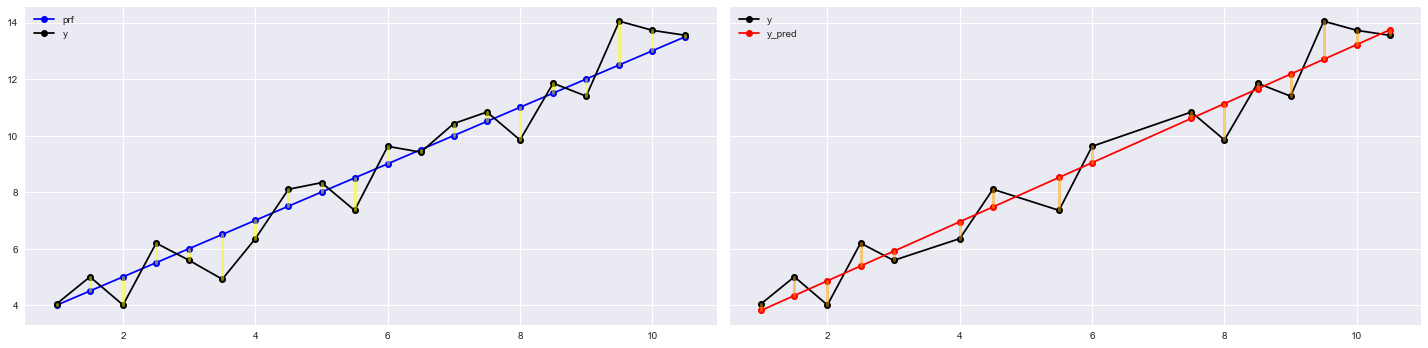

In [1]:
import linear_regression as lr
lr.plot_errors_vs_residuals()


<br>
The basic idea behind <b>residual analysis</b> is that a careful examination of the residuals can tell us whether our assumptions are reasonable and our choice of model is appropriate. 

<br>
Although we know that the error term is part of the physical reality, whereas the residual is just an algebrical construct of the data and the estimated parameters, we will see that it is possible to use the residuals for the purpose of validating our regression model.


## Residuals as estimators of the Error term

<br>
In the notebook about the <b>hat matrix</b> we learned that :

<br>
<blockquote>
$
    \begin{align}
        \mathbf{e} 
        \quad &= \quad
        \mathbf{M} \ \boldsymbol{\varepsilon}
        \newline \newline
        &= \quad
        \begin{bmatrix}
            (1 - h_{11})    &  -h_{12}       &  \dots  & -h_{1m}       \\
            -h_{21}         &  (1 - h_{22})  &  \dots  & -h_{2m}       \\
            \vdots & \vdots & \dots  & \vdots \\
            \vdots & \vdots & \ddots & \vdots \\
            -h_{m1}         &  -h_{m2}  &  \dots  & (1 - h_{mm})
        \end{bmatrix}_\textit{ m x m}
        \quad
        \begin{bmatrix}
            \varepsilon \\ \varepsilon_2 \\ \vdots \\ \vdots \\ \varepsilon_m
        \end{bmatrix}_\textit{ m x 1}
        \quad = \quad
        \begin{bmatrix}
            (1 - h_{11}) \ \varepsilon_1 + \sum_{j \neq 1}^{m} (-h_{ij}) \varepsilon_j  \\
            (1 - h_{22}) \ \varepsilon_1 + \sum_{j \neq 2}^{m} (-h_{ij}) \varepsilon_j  \\
            \vdots \\
            \vdots \\
            (1 - h_{mm}) \ \varepsilon_1 + \sum_{j \neq m}^{m} (-h_{ij}) \varepsilon_j  
        \end{bmatrix}_\textit{ m x 1}
        \quad = \quad
        \begin{bmatrix}
            e_1 \\ e_2 \\ \vdots \\ \vdots \\ e_m
        \end{bmatrix}_\textit{ m x 1} 
    \end{align}
$
</blockquote>

<blockquote>
$
    \begin{align}
        \mathrm{V}(\mathbf{e}) 
        \quad &= \quad
        \boldsymbol{\sigma^2} \ (\mathbf{I} - \mathbf{H})
        \newline \newline
        &= \quad
        \boldsymbol{\sigma^2} \quad
        \begin{bmatrix}
            (1 - h_{11})    &  -h_{12}       &  \dots  & -h_{1m}       \\
            -h_{21}         &  (1 - h_{22})  &  \dots  & -h_{2m}       \\
            \vdots & \vdots & \dots  & \vdots \\
            \vdots & \vdots & \ddots & \vdots \\
            -h_{m1}         &  -h_{N2}  &  \dots  & (1 - h_{mm})
        \end{bmatrix}_\textit{ m x m}
        \quad = \quad
        \boldsymbol{\sigma^2} \quad 
        \begin{bmatrix}
            \mathrm{Var}(e_1)        & \mathrm{Cov}(e_1, e_2) & \dots  & \mathrm{Cov}(e_1, e_m) \\
            \mathrm{Cov}(e_2, e_1)   & \mathrm{Var}(e_2)      & \dots  & \mathrm{Cov}(e_2, e_m) \\
            \vdots & \vdots & \dots  & \vdots \\
            \vdots & \vdots & \ddots & \vdots \\
            \mathrm{Cov}(e_m, e_1)   & \mathrm{Cov}(e_m, e_2) & \dots  & \mathrm{Var}(e_m)
        \end{bmatrix}_\textit{ N x N}
    \end{align}
$
</blockquote>

<blockquote>
$
    \mathrm{Var}(\boldsymbol{\mathbf{e}_i}) = \boldsymbol{\sigma^2} \ (1 - \boldsymbol{\mathbf{H}_{ii}})   
$
</blockquote>

<blockquote>
$
    \quad
    \boldsymbol{s^2} 
    = \dfrac
        { \sum_{i=1}^{m} \boldsymbol{{e_i}^2} }
        {mN - p }
    = \dfrac
        { \sum_{i=1}^{m} \boldsymbol{e}^{\top}\boldsymbol{e} }
        { m - p }
    = \dfrac
        { \text{SSR} }
        { m - p }
    \qquad \Rightarrow \qquad
    \widehat{\mathrm{V}(\mathbf{e})} = \boldsymbol{s^2} \ (\mathbf{I} - \mathbf{H}) 
$
</blockquote>

## Different types of plot

<br>
Different graphical representations of the residuals provide information on the adequacy of different aspects of the model :

<ul style="list-style-type:square">
    <br>
    <li>
        <b>residuals vs predictor scatter plot</b> : sufficiency of the functional part of the model: scatter plots of 
    </li>
    <br>
    <li> 
        <b>residuals vs predictors scatter plot</b> : non-constant variation across the data, 
        also <b>residuals vs time plot</b> for data collected over time
    </li>
    <br>
    <li>
        <b>response and errors vs time run charts</b> : drift in the errors (data collected over time)
    </li>
    <br>
    <li> 
        <b>lag plot</b> : independence of errors
    </li>
    <br>
    <li>
        <b>histogram and normal probability plots</b> : normality of errors
    </li>
</ul>

## Different types of residuals

<br>
Different types of investigation (checking different clrm assumptions) may also require the use of different types of residuals. 

<br>
Here we will lay the basis for these residuals : <br>

<ul style="list-style-type:square">
    <br>
    <li>
        <b>raw residual</b> : by definition
    </li>
    <br>
    <li> 
        <b>standardized residual</b> : the raw residual divided by the true standard deviation of the residual itself; <br>
        as the true standard deviation is unobservable, standardized residuals cannot be used
    </li>
    <br>
    <li>
        <b>internally studentized residual</b> : the raw residual divided by the estimated standard deviation of the
        residual itself; this is often called "standardized"
    </li>
    <br>
    <li> 
        <b>externally studentized residual</b>: the same as the internally studentized residual, except that the estimate of
        the standard deviation of the residual is calculated from a regression leaving out the observation in question ; this is
        often called simply "studentized"        
    </li>
    <br>
    <li>
        <b>pearson residual</b> : the raw residual divided by the standard deviation of the response variable instead that of
        the residuals
    </li>
</ul>


### Standardized Residuals

<br>
$
    \quad
    \boldsymbol{ {\mathbf{e}_{i}}^{*} } 
    \ = \ \dfrac { \boldsymbol{\mathbf{e}_i} } { \boldsymbol{\sigma^2} \ (1 - \boldsymbol{\mathbf{H}_{ii}}) }
$

<br>
Standardized residuals allow the residuals to be compared on the "standard scale" : <br>

<ul style="list-style-type:square">
    <br>
    <li>
        $\pm 2$ indicates something unusual
    </li>
    <br>
    <li> 
        $\pm 3$ indicates something really out of the ordinary
    </li>
    <br>
    <li>
        $\pm 4$ or larger simply shouldn't happen
    </li>
</ul>
<br>
Since the variance of the error terms $\boldsymbol{\sigma^2}$ is unobservable, being the error terms unobservable themselves, the standardized residuals cannot be used; we need an estimated value of this variance. 


### Internally Studentized Residuals

<br>
$
    \quad
    \boldsymbol{ {\mathbf{e}_{i}}^{int} } 
    \ = \ \dfrac { \boldsymbol{\mathbf{e}_i} } { \boldsymbol{s^2} \ (1 - \boldsymbol{\mathbf{H}_{ii}}) }
$

<br>
One problem that can arise when trying to identify outliers is when there is a potential outlier that influences the regression model to such an extent that the estimated regression function is "pulled" towards the potential outlier, so that it isn't flagged as an outlier using internally studentized residuals.

<br>
Externally studentized residuals offer an alternative criterion that is able to address this issue; but before describing this second type of studentized residuals we have to introduce the concept of leave-one-out.


### Leave-One-Out Residuals

<br>
An influential data point is able to "pull" the estimated regression line towards itselves. In this case, the value of the predicted response would be close to that of the observed response, and the residual small. But if we remove the influential data point from the data set, then the estimated regression line would "bounce back" away from the observed response, thereby resulting in a large residual. 

<br>
The basic idea is to delete the observations one at a time, each time re-fitting the regression model on the remaining $N - 1$ observations. Then, we compare the observed response values to the fitted values yielded by that specific iteration (based on the models with the $i^\text{th}$ observation deleted). This produces deleted residuals.


<br>
A data point with a large deleted (or "jack-knifed") residual suggests that the point is influential.

<br>
$
    \quad
    \boldsymbol{ \mathbf{e}_{i, -i} } 
    \ = \ \boldsymbol{\mathbf{Y}_i} - \hat{\boldsymbol{\mathbf{Y}}}_\boldsymbol{i, -i}
    \qquad \text{where} \quad \hat{\boldsymbol{\mathbf{Y}}}_\boldsymbol{i, -i} 
    \quad \text{is the predicted value of the response variable, regressed excluding the i-th observation} 
$


### Externally Studentized Residuals

<br>
$
    \quad
    \boldsymbol{ \mathbf{t}_i } 
    \ = \ \dfrac { \boldsymbol{\mathbf{e}_{i, -i}}  } { \boldsymbol{{s_{i, -i}}^{\ 2}} \ (1 - \boldsymbol{\mathbf{H}_{ii}}) }
    \qquad 
    \text{where} \quad \boldsymbol{{s_{i, -i}}^{\ 2}} = \dfrac { \sum_{j=1, \ j \neq i}^{m} \boldsymbol{{e_j}^2} } { m - p }
    \quad \text{is the predicted value of the response variable, regressed excluding the observation} 
$

<br>
Externally Studentized Residuals are simply studentized leave-one-out residuals.

## References

<br>
<ul style="list-style-type:square">
    <li>
        PennState University -  Stat 501 - 
        <a href="https://bit.ly/2KNOP9x">
        Lesson 4: SLR Model Assumptions</a>
    </li>
    <br>
    <li>
        PennState University -  Stat 462 - 
        <a href="https://bit.ly/2IJIn6W">
        Lesson 9: Influential Points</a>
    </li>
    <br>  
    <li>
        Introduction to Statistical Modeling with SAS/STAT Software - Statistical Background - 
        <a href="https://bit.ly/2IL7LVJ">
        Linear Model Theory : Residual Analysis</a>
    </li>
    <br>    
    <li>
        Stack Exchange - Cross Validated - 
        <a href="https://bit.ly/2J4fyl2">
        Raw residuals vs standardised residuals vs studentised residuals - what to use when ?</a>
    </li>
    <br>  
    <li>
        Wharton School of the University of Pennsylvania - Richard Waterman - Stat 701 - 
        <a href="https://whr.tn/2Lun3A6">
        Leverage, residuals and influence</a>
    </li>
    <br>
    <li>
        Wikipedia - 
        <a href="https://bit.ly/2IHh2lC">
        Regression Validation</a>
    </li>
    <br>
    <li>
        Wikipedia - 
        <a href="https://bit.ly/2IIpUn4">Studentized Residual </a>
    </li>
</ul>